<a href="https://colab.research.google.com/github/nenggoloo9405/UAS-KomputerGrafis/blob/main/UAS_Komgraf_G211230073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengunggah file CSV
from google.colab import files
uploaded = files.upload()


Saving stock.csv to stock.csv


In [8]:
# Impor pustaka yang dibutuhkan
from google.colab import data_table
import pandas as pd

# Mengaktifkan formatter untuk DataFrame
data_table.enable_dataframe_formatter()

# Path ke file CSV
file_path = '/mnt/data/stock.csv'

# Memuat file CSV dengan delimiter yang sesuai dan menghapus spasi setelah pemisahan
data = pd.read_csv("stock.csv", delimiter=';', skipinitialspace=True)

# Menampilkan DataFrame menggunakan data_table
data

,Stock Name,Symbol,Shares,Purchase Price,Cost Basis,Current Price,Market Value,Gain/Loss,Dividend/share,Annual Yield
0,Apple,AAPL,100,$90.00,"$9,000.00",$144.13,"$14,413.27","$14,269.14",$2.28,1.58%
1,Microsoft,MSFT,200,$32.00,"$6,400.00",$65.57,"$13,114.14","$13,048.57",$2.24,2.38%
2,Salesforce,CRM,50,$40.00,"$2,000.00",$47.48,"$2,374.00","$2,352.00",$0.54,1.14%
3,Oracle,ORCL,200,$35.00,"$7,000.00",$44.56,"$8,912.00","$8,822.00",$0.36,0.81%
4,Hewlett Packard Enterprise,HPE,500,$18.00,"$9,000.00",$14.92,"$7,460.00","$7,521.00",$0.30,2.01%
5,Alphabet,GOOG,100,$225.00,"$22,500.00",$223.33,"$22,333.00","$22,376.00",$0.00,0.00%
6,Intel,INTC,150,$30.00,"$4,500.00",$31.03,"$4,654.50","$4,522.00",$1.02,3.29%
7,Cisco,CSCO,225,$22.00,"$4,950.00",$23.12,"$5,202.00","$5,199.00",$0.72,3.11%
8,Qualcomm,QCOM,185,$65.00,"$12,025.00",$88.33,"$16,350.25","$16,495.00",$2.48,2.81%
9,Amazon,AMZN,10,$410.00,"$4,100.00",$820.00,"$8,200.00","$8,357.00",$0.00,0.00%


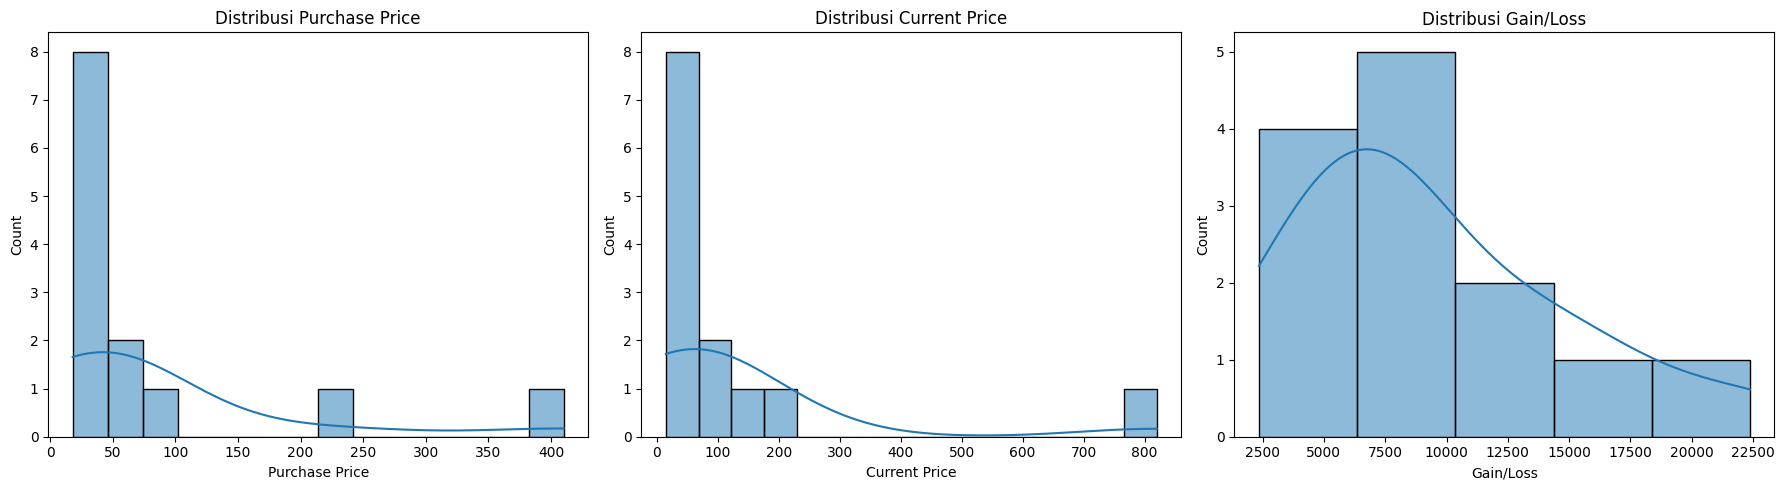

In [15]:
# Membaca file CSV
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, delimiter=';')

# Membersihkan data
df['Purchase Price'] = df['Purchase Price'].replace('[\$,]', '', regex=True).astype(float)
df['Current Price'] = df['Current Price'].replace('[\$,]', '', regex=True).astype(float)
df['Market Value'] = df['Market Value'].replace('[\$,]', '', regex=True).astype(float)
df['Gain/Loss'] = df['Gain/Loss'].replace('[\$,]', '', regex=True).astype(float)
df['Dividend/share'] = df['Dividend/share'].replace('[\$,]', '', regex=True).astype(float)
df['Annual Yield'] = df['Annual Yield'].replace('[\%,]', '', regex=True).astype(float)

# Membuat visualisasi

# Setel ukuran default untuk plot
plt.rcParams['figure.figsize'] = (12, 6)

# a.) Distribusi data pada setiap atribut Purchase Price, Current Price, dan Gain/Loss dengan grafik histogram
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Purchase Price'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Purchase Price')
axes[0].set_xlabel('Purchase Price')

sns.histplot(df['Current Price'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Current Price')
axes[1].set_xlabel('Current Price')

sns.histplot(df['Gain/Loss'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Gain/Loss')
axes[2].set_xlabel('Gain/Loss')

plt.tight_layout()
plt.show()

In [24]:
# b.) Atribut Stock Name dan Symbol yang memiliki Dividend/share 5 tertinggi
# Atribut Stock Name dan Symbol yang memiliki Dividen / Share 5 tertinggi 2(B)
top_5_dividend = df.nlargest(5, 'Dividend/share')[['Stock Name', 'Symbol', 'Dividend/share']]
print("Top 5 Stocks by Dividend/share:")
print(top_5_dividend)

Top 5 Stocks by Dividend/share:
  Stock Name Symbol  Dividend/share
8   Qualcomm   QCOM            2.48
0      Apple   AAPL            2.28
1  Microsoft   MSFT            2.24
6      Intel   INTC            1.02
7      Cisco   CSCO            0.72


In [25]:
# c.) Atribut Stock Name dan Symbol yang memiliki Market Value 5 tertinggi
top_5_market_value = df.nlargest(5, 'Market Value')[['Stock Name', 'Symbol', 'Market Value']]
print("\nTop 5 Stocks by Market Value:")
print(top_5_market_value)


Top 5 Stocks by Market Value:
  Stock Name Symbol  Market Value
5   Alphabet   GOOG      22333.00
8   Qualcomm   QCOM      16350.25
0      Apple   AAPL      14413.27
1  Microsoft   MSFT      13114.14
3     Oracle   ORCL       8912.00


In [27]:
# d.) Atribut Stock Name dan Symbol yang memiliki Annual Yield 7 tertinggi
top_7_annual_yield = df.nlargest(7, 'Annual Yield')[['Stock Name', 'Symbol', 'Annual Yield']]
print("\nTop 7 Stocks by Annual Yield:")
print(top_7_annual_yield)


Top 7 Stocks by Annual Yield:
                   Stock Name Symbol  Annual Yield
6                       Intel   INTC          3.29
7                       Cisco   CSCO          3.11
8                    Qualcomm   QCOM          2.81
1                   Microsoft   MSFT          2.38
4  Hewlett Packard Enterprise    HPE          2.01
0                       Apple   AAPL          1.58
2                  Salesforce    CRM          1.14
